# **Palmer Penguins**

![Penguins](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Gentoo_Penguin_AdF.jpg/640px-Gentoo_Penguin_AdF.png)

This notebook contains my analysis of the famous Palmer Penguins dataset.

The dataset is available on GitHub [here](https://allisonhorst.github.io/palmerpenguins/).

My analysis adheres to the following structure, click any of the headings to jump to that section:

1. [**Libraries:**](#lib) in which I import the Python libraries used in this notebook and provide a brief explanation of each.
2. [**Loading the Data:**](#load) next, the Palmer Penguins dataset is loaded from a URL.
3. [**Types:**](#type) a brief analysis of the types of data contained within the dataset is given.
4. [**Data Visualisation:**](#data) I plot a bar chart and histogram of penguin sex and bill depth, respectively.
5. [**Correlation:**](#corr) finally, I check how correlated two variables (flipper lenth and body mass) are; plotting them on scatterplot and assessing their correlation coeeficient to do so.
6. [**References.**](#ref) provides the sources of information used to build this notebook: names of authors, titles of work, links to articles if applicable, along with short blurbs describing each reference.

***
## 1. Libraries <a id='lib'></a>

Pandas is used for the DataFrame data structure (a two dimensional data structure with rows and columns, like a spreadsheet). It allows us to investigate CSV files, amongst other features.

Matplotlib is a plotting library. Pyplot allows for interactive plots and programmatic plot generation.

Numpy is a library used for numerical computing. We will use it to support multidimensional arrays later on in the notebook.

In [465]:
# Data frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Numerical Arrays
import numpy as np

***
## 2. Loading the Data <a id='load'></a>

The palmer penguins dataset is loaded from a URL.

In [466]:
# Load the Penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

Having loaded the data, it can now be examined on a surface level.

In [467]:
# Having a look
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE



Now that the dataset is loaded in we can begin to explore the data held within it.

This dataset focuses on three species of penguins across three islands in the Palmer Archipeligo.

We can check what these species are and how many of them were recorded on each island.

In [468]:
# Grouping by species and island and counting the number of penguins
penguins_by_species_island = df.groupby(['species', 'island']).size().reset_index(name='count')

# Displaying the counts
penguins_by_species_island

,species,island,count
0,Adelie,Biscoe,44
1,Adelie,Dream,56
2,Adelie,Torgersen,52
3,Chinstrap,Dream,68
4,Gentoo,Biscoe,124


Evidently, this study encompasses 344 penguins. These are made up of:

- 68 Chinstrap penguins, all recorded on Dream.
- 124 Gentoo penguins, all recorded on Biscoe.
- 152 Adelie penguins, distributed across Dream, Biscoe and Torgersen.

***
## 3. Types <a id='type'></a>

The variables that we found in the section above are made up of different *types* of data.

Let's gain some insight into the types of data this dataset holds:

In [469]:
# Inspecting types
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

As we can see above, there are 'object' and 'float64' types in this dataset. In this case, the 'objects' are strings and 'float64' stands for floats (stored using 64 bits).

**Strings**: Strings are used to represent textual data, in this case it's the categorical data of the Palmer Penguins dataset: the variables 'species', 'island' and 'sex'. In Python, strings are made up of a sequence of characters (letters, numbers, symbols, spaces) enclosed by single ('') or double ("") quotes.

**Floats**: Short for floating point numbers, floats are the type of data which represents numbers with a decimal point. In the Palmer Penguins dataset there are four variables that hold numerical data with decimal points, these are: 'bill length', 'bill depth', 'flipper length' and 'body mass'. These floats are stored within 64 bits. Storing floats can have it's potential pifals; from not being able to store the largest floats with absolute precision to sometimes losing precision when carrying out certain arethmetic. However, the numbers involved in this particular dataset are neither too large nor is this study examining them with such a level of rigour for us to worry about the floating point numbers involved (we arent launching rockets... *yet*).

Using the floating point variables, we can run the dataset through the describe function to examine the perameters of the numerical data. 

In [470]:
# Summary of data
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


The above table will come in handy in the next section as we can use it to gather a quick snapchot of the boundaries of the data, giving us some clues as to how the variables might be best plotted.

***
## 4. Data Visualisation <a id='data'></a>

Having an understanding of the structure of the data and the types of variables within it, we can now have a play around with the data visually by plotting it in various ways.

Let's begin by plotting a barchart of the sex of the penguins involved in this study. We will differentiate the colours of the two categories (male and female) so as to distinguish them from one another.


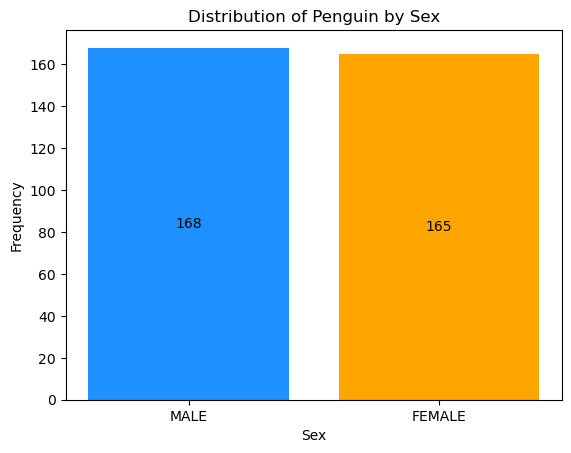

In [471]:
# Counting penguins per sex
sex_counts = df['sex'].value_counts()

# Defining the colours for each sex
colors = ('dodgerblue', 'orange')

# Defining the barchart variable, adding colours
bar_chart = plt.bar(sex_counts.index, sex_counts, color=colors)

# Plotting the barchart variable with counts displayed on the bars
plt.bar_label(bar_chart, labels=sex_counts, label_type='center')

# Axis Labels
plt.xlabel('Sex')
plt.ylabel('Frequency')

# Title
plt.title('Distribution of Penguin by Sex')

# Displaying the plot
plt.show()


Our barchart shows a balanced gender distribution amongst the Palmer Penguins. There is a fairly even spread between male (168) and female (165) penguins, with slighly more male penguins (3) being counted in the study.

Next, let's create a histogram of the bill depth of the penguins. Our histogram should show us, at a glance, the distribution of penguin bill depths.

<function matplotlib.pyplot.show(close=None, block=None)>

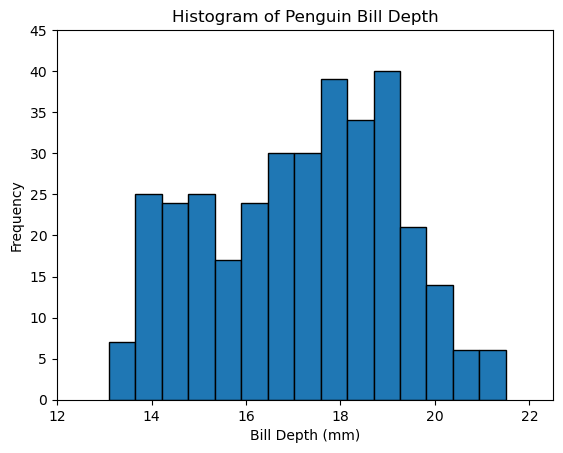

In [472]:
# Plotting the histogram, setting the number of bins, outlining bins in black
plt.hist(df['bill_depth_mm'], bins = 15, edgecolor='black')

# Axis Labels
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')

# Title
plt.title('Histogram of Penguin Bill Depth')

# X Limits
plt.xlim(12, 22.5)

# Y Limits
plt.ylim(0, 45)

# Displaying plot
plt.show

The above histogram contains data for the three sets of penguin species. 

The mininimum bill depth is 13.1 mm and the maximum bill depth is 21.5 mm (a range of 8.4 mm). The plot above 'peaks' at the mode of penguin bill depth (19 mm), or the point at which the highest frequency of values occur. Note that this is different from the mean of penguin bill depth (17 mm) as the mean is influenced by outliers in the data which might skew it away from the central tendancy.

We can see that there apepars to be a trough just under the 16 mm bill depth. Let's see if we plot the same histogram, but this time distinguishing each penguin species by colour, if we can gain any further insights into this fluctuation.

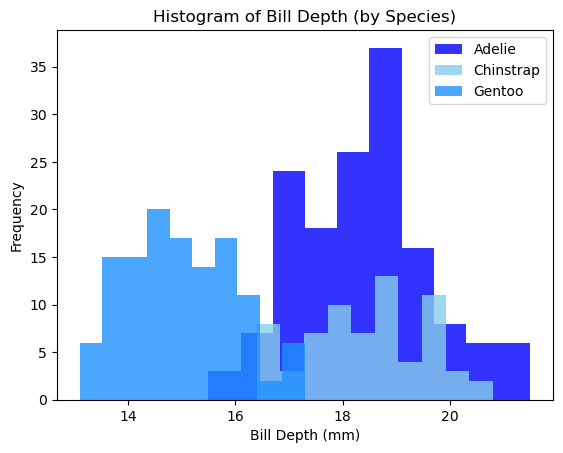

In [473]:
# Filtering the dataset by species
adelies_billdepth = df[df['species'] == 'Adelie']['bill_depth_mm']
chinstraps_billdepth = df[df['species'] == 'Chinstrap']['bill_depth_mm']
gentoos_billdepth = df[df['species'] == 'Gentoo']['bill_depth_mm']

# Plotting the three species individually on one plot, distinguishing by colour, labelling and adding a light transparency (alpha)
plt.hist(adelies_billdepth, bins=10, color='blue', alpha=0.8, label='Adelie')
plt.hist(chinstraps_billdepth, bins=10, color='skyblue', alpha=0.8, label='Chinstrap')
plt.hist(gentoos_billdepth, bins=10, color='dodgerblue', alpha=0.8, label='Gentoo')

# Axis labels
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')

# Title
plt.title('Histogram of Bill Depth (by Species)')

# Legend
plt.legend()

# Displaying plot
plt.show()

As we can see, there are different modes for the bill depths of the different species, these are the points where the highest frequency of values occur. The through we see is explained by the Gentoo penguins having a smaller bill depth when compared to both the Adelie's and Chinstraps.

Each species appears to display a normal, or Guassian, distribution (what appears as a bell curve when plotted). This leads me to wonder is it 'normal' for things in the natural world to follow a normal distribution with the bell curve (if there is one) always 'peaking' at the evolutionarily optimal point for an attribute (such as bill depth) amongst a population of a species within a given habitat at a particular point in time?

Certainly, these questions could be answered by building upon the foundational data analytics tools used in this analysis, given the raw data is available.

***
## 5. Correlation <a id='corr'></a>

Having plot some single variable plots, it's time to move on to comparing two variables together.

In this final section we will compare the variables flipper length and body mass.

We can use numpy to create an array for the two variables (this isolates the raw values from the dataframe). We will then use matplotlib to plot those values.

Below, we take a quick look at the two arrays created by printing the first 25 values of each. We can also see that these sets of numbers are of type 'array' by printing their type.

In [474]:
# Flipper length
flength = df['flipper_length_mm'].to_numpy()

# Show(first values)
print(flength[:25])

# Type
print(type(flength))

[181. 186. 195.  nan 193. 190. 181. 195. 193. 190. 186. 180. 182. 191.
 198. 185. 195. 197. 184. 194. 174. 180. 189. 185. 180.]
<class 'numpy.ndarray'>


In [475]:
# Body mass
bmass = df['body_mass_g'].to_numpy()

# Show(first values)
print(bmass[:25])

# Type
print(type(bmass))

[3750. 3800. 3250.   nan 3450. 3650. 3625. 4675. 3475. 4250. 3300. 3700.
 3200. 3800. 4400. 3700. 3450. 4500. 3325. 4200. 3400. 3600. 3800. 3950.
 3800.]
<class 'numpy.ndarray'>


Having the two arrays created, we can now plot them together on a scatterplot.

Before we do this, let's create a line of best fit to add to that plot.

We will need to remove NaN (not a number) values first. This is an example of data cleansing; tidying the dataset so that only it is more reliable for analysis.

In [476]:
# Checking for NaN values in flength and bmass
NaNs = np.isnan(flength) | np.isnan(bmass)

# Removing NaN values from flength and bmass
flength_clean = flength[~NaNs]
bmass_clean = bmass[~NaNs]

# Calculating the line of best fit
m, c = np.polyfit(flength_clean, bmass_clean, 1)

# Show m and c
m, c

(49.68556640610011, -5780.831358077061)

Let's now create 100 values per axes to plot a best fit line.

In [477]:
# X values for best fit line
bf_x = np.linspace(170, flength_clean.max() + 1, 100)

# Y values for best fit line
bf_y = m * bf_x + c

We can now plot the flipper length and body mass data on a scatterplot, along with the line of best fit.

(2500.0, 6500.0)

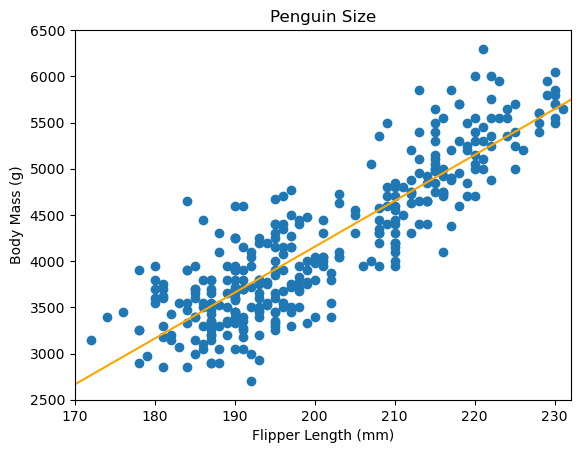

In [478]:
# Creating figure and set of axes
fig, ax = plt.subplots()

# Plotting values (as dots)
ax.plot(flength, bmass, 'o')

# Plotting line of best fit as a red line
ax.plot(bf_x, bf_y, color = 'orange', linestyle = '-')

# Axis Labels
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Body Mass (g)')

# Title
ax.set_title('Penguin Size')

# X Limits
ax.set_xlim(170, 232)

# Y Limits
ax.set_ylim(2500, 6500)

Above, we have our scatterplot comparing body mass and flipper length.

On initial inspection of the plot, there is a clear positive correlation between the two variables: as body mass increases, so too does flipper length. The line of best fit centrally aligns with the points as body mass and flipper length increases.

To add to the validity to our results we should also check their correlation coefficient.

The Pearson correlation coefficient is a numerical measure of linear correlation: as two variables become more strongly associated they will come closer to a Pearson correlation coefficient of +1 (positive relationship) or -1 (negative relationship). If the Pearsons correlation coefficient is exactly +1, then all the values would be on our line of best fit.

Our plot suggests we will have a positive correlation coefficient and, as there appears to be a strong relationship between the two variables, one that will be closer to 1 than to 0 (but not exactly 1- clearly the values are dispersed from the line of best fit in our plot).

Let's use the numpy correlation coefficient function to get our answer:

In [479]:
# Measuring the correlation
np.corrcoef(flength_clean, bmass_clean)

array([[1.        , 0.87120177],
       [0.87120177, 1.        ]])

The Pearson correlation coefficient of the variables flipper length and body mass is 0.87.

This proves that, amongst the penguins of this study, there is a very strong correlation between the length of a penguins flipper and its body mass.

It would be intruiging to add further variables in to this anlysis. We could check if the correlation coefficient for these two variables differs for the different species, or by the sex of the penguins.

Hypothetically, had Gorman et al. tracked the penguins diet it might be insightful to see how many fish each penguin ate per day and adding that to the comparison of flipper length and body mass.

Further, tracking the physical characteristics of the Palmer Penguins across time in a longitudinal study, particularly in light of climate change, would be very interesting. As other sources such as the [British Antarctic Survey](https://www.bas.ac.uk/data/our-data/publication/penguins/) suggest in their analysis of other penguin habitats, it may be the case that the different species of penguins included in this study are coping differently with a changing climate:

> "In the last 30 years, populations of Adélie penguins on the South Orkney Islands have fluctuated and are currently in decline, while chinstrap populations have decreased significantly and gentoo numbers have risen"
>
> -- British Anarctic Survey

Certainly, as has been demonstrated, there is plenty to analyse within this study alone and, using the foundational data analysis techniques I have demonstrated, there are many ways to go about this.

***
## 6. References <a id='ref'></a>

| Author                                 | Title                                                                                                         | Blurb                           |
| :---                                   |    :----:                                                                                                     |          :---:                  |
| De Frias, Arturo. Wikimedia Commons | [Gentoo Penguins on "Penguin Highway"](https://commons.wikimedia.org/wiki/File:Gentoo_Penguin_AdF.jpg)| This is the cover image used for this notebook (a group of Gentoo penguins).   |
| Driscoll, Mike. Real Python         | [*Jupyter Notebook: An Introduction*](https://realpython.com/jupyter-notebook-introduction/)                  | A quick introduction to Jupyter Notebooks; how to create and manage them.     |
| GitHub Docs | [*Basic writing and formatting syntax: Create sophisticated formatting for your prose and code on GitHub with simple syntax*](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) | Guide for the basics of markdown; stylising text, making lists, adding images, etc. |
| Gorman KB, Williams TD, Fraser WR | [*Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis)*](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081) | The original Palmer Penguins research article. The Palmer Penguins dataset can easily be found [here](https://allisonhorst.github.io/palmerpenguins/). |
| Hunter John, Dale Darren, Firing Eric, Droettboom Michael, Matplotlib Development Team. Matplotlib.org Guides | [*Matplotlib.colors*](https://matplotlib.org/stable/api/colors_api.html#) | Matplotlibs guide to adding colours to plots. This can get quiet in depth, only the basics are utitlised within this notebook. |
| Laerd Statistics | [*Pearson's product moment correlation: Statistical tutorials and software guides*](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php) | Outlines what Pearson's Correlation Coefficient is as is not, delves further in depth than this notebook does (highlightes 7 assumptions that the variables must meet to be appropriate for testing using the Pearson's correlation- I didn't get into this). Still, a very approachable guide. |
| NumPy User Guide | [NumPy: the absolute basics for beginners](https://numpy.org/doc/stable/user/absolute_beginners.html) | Installing NumPy and working with numerical data in Python |
| Pandas Documentation | [*10 Minutes to Pandas Guide*](https://pandas.pydata.org/docs/user_guide/10min.html) | How to create arrays with Panda's, like most of the articles referenced here- this one includes info for both beginners and those with a little more experience. Pick and choose what you need from it. |
| Raschka, Sebastian | [Creating a table of contents with internal links in IPython Notebooks and Markdown documents](https://sebastianraschka.com/Articles/2014_ipython_internal_links.html) | In this article, Raschka gives a quick demo on how to create internal, clickable links with HTML- I added these to the start of my notebook and set 'anchors' at the start of each section so the reader should be able to jump to their desired section. |
| Ratcliffe Norman, Forcada Juame. British Antarctic Survey | [*Penguins and Climate Change*](https://www.bas.ac.uk/data/our-data/publication/penguins/) | I reference this article when discussing the idea of a longitudinal study of the Palmer Penguins. This article highlights that, on the South Orkney Islands, the populations of the three species of penguins (those featured in the Palmer Penguins dataset) are fluctuating in different ways- with some declining and some increasing. |
| Solomon, Brad. Real Python | [*Python Plotting with Matplotlib (Guide)*](https://realpython.com/python-matplotlib-guide/) | Lots of useful information on plotting, additional resources are available at the end of the article. |
| Tufte, Edward R | *The Visual Display of Quantitative Information: Second Edition*. Cheshire: Graphic Press. | This one provides some best practices for visualy representing data. The standout point for me is to use colour with consideration for those with colourblindness. Tufte highlights that red/green are the most common colours people struggle to see- therefore, blue is a good choice for plotting. Matplotlib uses blue as it's default colour (at least for barcharts, histograms and scatterplots). I elected to use blue as the uniform color for my plots with a high contrasting color (orange) as a secondary color. |
| W3 Schools | [*Matplotlib Tutorials*](https://www.w3schools.com/python/matplotlib_intro.asp) | Another useful one for plotting. I used this to see how I could enhance my plots visually by adding titles, legends, etc. |
| W3 Schools | [*Python Data Types*](https://www.w3schools.com/python/python_datatypes.asp) | Contains lots of information on the various types of data within Python. |
| Zhane, Jaya. RealPython | Writing Comments in Python (Guide) | I used this guide to inform how I commented within my python code (with the aim of keeping comments uniform stylistically). |

***

### End

***